In [ ]:
!git clone https://github.com/shreyas-bk/U-2-Net.git

Cloning into 'U-2-Net'...
remote: Enumerating objects: 520, done.
remote: Total 520 (delta 0), reused 0 (delta 0), pack-reused 520
Receiving objects: 100% (520/520), 12.39 MiB | 25.27 MiB/s, done.
Resolving deltas: 100% (234/234), done.


In [ ]:
import os
import cv2
import numpy as np
import os



def saliency_detection2(inputImgPath):
   

    # Load the input image.
    inputImage = cv2.imread(inputImgPath) 

    # Path of the input images directory of the model.
    INPUTIMGDIR = 'U-2-Net/images/'

    # Check if the input images directory does not already exist.
    if not os.path.exists(INPUTIMGDIR):

        # Make the input directory.   
        os.mkdir(INPUTIMGDIR)

    # Extract the name of the input image.
    inputImgName = inputImgPath.split('/')[-1].split('.')[0]

    # Write the input image to the directory where input images for the model are stored.
    cv2.imwrite(INPUTIMGDIR + inputImgName + '.jpg', inputImage)

    # The path of the output images directory of the model.
    OUTPUTIMGDIR = 'U-2-Net/results/'

    # Check if the output images directory does not already exist.
    if not os.path.exists(OUTPUTIMGDIR):

        # Make the ouput directory.   
        os.mkdir(OUTPUTIMGDIR)

    # Change the current directory to the U-2-Net directory.
    os.chdir('U-2-Net/')

    # Perform salient object detection on the image stored in the input directory of the model
    # and store the output image into the output directory.
    !python -W ignore u2net_test.py

    # Go back.
    os.chdir('../')

    # Remove the image from the input directory.
    os.remove(INPUTIMGDIR + inputImgName + '.jpg')

    # Load the output image.
    # The model outputs it with the same name but in .png format.
    outputImg = cv2.imread(OUTPUTIMGDIR + inputImgName + '.png')

    # Return the output image.
    return outputImg

def remove_background2(srcImg, outputImg, THRESHOLD = 0.3):
   

    # Create a copy of a output image channel and normalize it by dividing it by 255 which makes pixel values range 0-1.
    mask =  outputImg.copy()[:,:,0] / 255

    # Update all the values below or equal to the threshold to zero.
    mask[mask <= THRESHOLD] = 0

    # Update all the values greater than the threshold to one.
    mask[mask > THRESHOLD] = 1

    # Create a copy of the source image.
    obj = srcImg.copy()

    # Update all the values of the source image to zero at indexes where the mask values are zero i.e. background.
    obj[mask == 0] = 0

    # Return the extracted object from the source image and the mask image.
    return obj, mask

def merge2(obj, bgImg, mask):
   

    # Resize the background according to the source (foreground) image shape.
    #print(bgImg.shape)
    bgImg = cv2.resize(bgImg, (obj.shape[1], obj.shape[0]))
    #print(bgImg.shape)
    
    # Update all the values of the background image to zero at indexes where the mask values are one. 
    # This is where the foreground (object) will be inserted.
    bgImg [mask == 1] = 0
    
    # Merge the foreground (object) and the background.
    mergedImage = bgImg + obj
    
    # Return the merged image.
    return mergedImage

In [ ]:
x = os.listdir("/content/images")
x

In [ ]:
from google.colab.patches import cv2_imshow
import os


# count2 = 0
count = 11
# for j in range(2,9):

x = os.listdir("/content/images")
#count2 = count2 + 1
  
for i in x:

  #print(i)
  outimg = saliency_detection2("/content/images/"+str(i))
  #outimg = cv2.flip(outimg2, 0)

  img2 = cv2.imread("/content/images/"+str(i))
  height,width = img2.shape[0], img2.shape[1]
  #img2 = cv2.flip(img22, 0)

  #bgImg = cv2.imread("/content/top"+str(j)+".jpg")
  bgImg = np.zeros((height,width,3), np.uint8)
  bgImg[:,:] = (199,195,195)


  obj, mask = remove_background2(img2, outimg, THRESHOLD = 0.3)

  final_img = merge2(obj, bgImg, mask)

  #full_final_img = cv2.resize(final_img, (width, height))

  cv2.imwrite("/content/out_img/new_o_gen"+str(count)+".jpg", final_img)
  count = count + 1

['/content/U-2-Net/images/frame2603.jpg']
inferencing: frame2603.jpg
['/content/U-2-Net/images/frame264.jpg']
inferencing: frame264.jpg
['/content/U-2-Net/images/frame2796.jpg']
inferencing: frame2796.jpg
['/content/U-2-Net/images/frame2232.jpg']
inferencing: frame2232.jpg
['/content/U-2-Net/images/frame2724.jpg']
inferencing: frame2724.jpg
['/content/U-2-Net/images/frame660.jpg']
inferencing: frame660.jpg
['/content/U-2-Net/images/frame2256.jpg']
inferencing: frame2256.jpg
['/content/U-2-Net/images/frame862.jpg']
inferencing: frame862.jpg
['/content/U-2-Net/images/frame1673.jpg']
inferencing: frame1673.jpg
['/content/U-2-Net/images/frame287.jpg']
inferencing: frame287.jpg


In [ ]:
from google.colab.patches import cv2_imshow
import os

def bordermaker(im):
  bordersize = 200
  border = cv2.copyMakeBorder(
      im,
      top=bordersize,
      bottom=bordersize,
      left=bordersize,
      right=bordersize,
      borderType=cv2.BORDER_CONSTANT,
      value=[0, 0, 0]
  )
  return border

count2 = 0
count = 176
for j in range(2,9):

  x = os.listdir("/content/img3")
  count2 = count2 + 1
  
  for i in x:


    outimg = saliency_detection2("/content/img3/"+str(i))
    bordered_out = bordermaker(outimg)
    #outimg = cv2.flip(outimg2, 0)

    img2 = cv2.imread("/content/img3/"+str(i))
    height,width = img2.shape[0], img2.shape[1]
    bordered = bordermaker(img2)
    #img2 = cv2.flip(img22, 0)

    bgImg = cv2.imread("/content/top"+str(j)+".jpg")

    obj2, mask2 = remove_background2(bordered, bordered_out, THRESHOLD = 0.3)


    angle = 270
    rows, cols, channels = obj2.shape
    rows1, cols1= mask2.shape

    
    # Rotate image from center of image with an angle of 45 degrees at the same scale.
    rotation_matrix = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1)

    rotation_matrix1 = cv2.getRotationMatrix2D((cols1/2,rows1/2), angle, 1)
    
    # Apply the transformation
    obj = cv2.warpAffine(obj2, rotation_matrix, (cols,rows))
    mask = cv2.warpAffine(mask2, rotation_matrix1, (cols1,rows1))



    final_img = merge2(obj, bgImg, mask)

    full_final_img = cv2.resize(final_img, (width, height))

    cv2.imwrite("/content/new/gen"+str(count)+".jpg", full_final_img)
    count = count + 1

# cv2_imshow(img2)
# cv2_imshow(mask)
# cv2_imshow(outimg)
# cv2_imshow(obj)
#cv2_imshow(final_img)
# cv2.waitKey(0)


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

im = cv2.imread('/content/Images/frame2609.jpg')
row, col = im.shape[:2]
bottom = im[row-2:row, 0:col]
mean = cv2.mean(bottom)[0]

bordersize = 10
border = cv2.copyMakeBorder(
    im,
    top=bordersize,
    bottom=bordersize,
    left=bordersize,
    right=bordersize,
    borderType=cv2.BORDER_CONSTANT,
    value=[0, 0, 0]
)

cv2_imshow(im)
cv2_imshow(bottom)
cv2_imshow(border)
print(im.shape)
print(border.shape)
#print(mean)



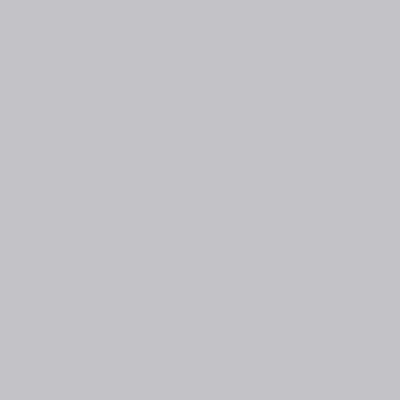

In [ ]:
import cv2  # Not actually necessary if you just want to create an image.
import numpy as np
from google.colab.patches import cv2_imshow

blank_image = np.zeros((400,400,3), np.uint8)
blank_image[:,:] = (199,195,195)      # (B, G, R)
#blank_image[:,400//2:400] = (0,255,0)

cv2_imshow(blank_image)

# For Video

In [ ]:
import os
import cv2
import numpy as np
import os



def saliency_detection(inputImgPath):
   

    # Load the input image.
    #inputImage = cv2.imread(inputImgPath) 

    # Path of the input images directory of the model.
    INPUTIMGDIR = 'U-2-Net/images/'

    # Check if the input images directory does not already exist.
    if not os.path.exists(INPUTIMGDIR):

        # Make the input directory.   
        os.mkdir(INPUTIMGDIR)

    # Extract the name of the input image.
    inputImgName = "img"

    # Write the input image to the directory where input images for the model are stored.
    cv2.imwrite(INPUTIMGDIR + inputImgName + '.jpg', inputImgPath)

    # The path of the output images directory of the model.
    OUTPUTIMGDIR = 'U-2-Net/results/'

    # Check if the output images directory does not already exist.
    if not os.path.exists(OUTPUTIMGDIR):

        # Make the ouput directory.   
        os.mkdir(OUTPUTIMGDIR)

    # Change the current directory to the U-2-Net directory.
    os.chdir('U-2-Net/')

    # Perform salient object detection on the image stored in the input directory of the model
    # and store the output image into the output directory.
    !python -W ignore u2net_test.py

    # Go back.
    os.chdir('../')

    # Remove the image from the input directory.
    os.remove(INPUTIMGDIR + inputImgName + '.jpg')

    # Load the output image.
    # The model outputs it with the same name but in .png format.
    outputImg = cv2.imread(OUTPUTIMGDIR + inputImgName + '.png')

    # Return the output image.
    return outputImg

def remove_background(srcImg, outputImg, THRESHOLD = 0.3):
   

    # Create a copy of a output image channel and normalize it by dividing it by 255 which makes pixel values range 0-1.
    mask =  outputImg.copy()[:,:,0] / 255

    # Update all the values below or equal to the threshold to zero.
    mask[mask <= THRESHOLD] = 0

    # Update all the values greater than the threshold to one.
    mask[mask > THRESHOLD] = 1

    # Create a copy of the source image.
    obj = srcImg.copy()

    # Update all the values of the source image to zero at indexes where the mask values are zero i.e. background.
    obj[mask == 0] = 0

    # Return the extracted object from the source image and the mask image.
    return obj, mask

def merge(obj, bgImg, mask):
   

    # Resize the background according to the source (foreground) image shape.
    bgImg = cv2.resize(bgImg, (obj.shape[1], obj.shape[0]))
    
    # Update all the values of the background image to zero at indexes where the mask values are one. 
    # This is where the foreground (object) will be inserted.
    bgImg [mask == 1] = 0
    
    # Merge the foreground (object) and the background.
    mergedImage = bgImg + obj
    
    # Return the merged image.
    return mergedImage

In [ ]:
from google.colab.patches import cv2_imshow
import os

cap = cv2.VideoCapture("/content/cat.mp4")
frame_width = int(cap.get(3))

frame_height = int(cap.get(4))
out1 = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'),20, (frame_width,frame_height))
while True:
  try:
    _, img = cap.read()
    outimg = saliency_detection(img)

    #img2 = cv2.imread("/content/images/"+str(i))

    bgImg = cv2.imread("/content/g.jpg")

    obj, mask = remove_background(img, outimg, THRESHOLD = 0.7)

    final_img = merge(obj, bgImg, mask)
    out1.write(final_img)
  except:
    print("Video End.....")
    break
    cap.release()
    out1.release()

['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.jpg']
inferencing: img.jpg
['/content/U-2-Net/images/img.j

In [ ]:
cv2.imwrite("final_img4.jpg", final_img)

True

In [ ]:
!zip -r /content/out_imgs.zip /content/out_img

  adding: content/out_img/ (stored 0%)
  adding: content/out_img/new_o_gen2.jpg (deflated 21%)
  adding: content/out_img/gen16.jpg (deflated 22%)
  adding: content/out_img/new_o_gen19.jpg (deflated 29%)
  adding: content/out_img/new_o_gen12.jpg (deflated 20%)
  adding: content/out_img/new_o_gen20.jpg (deflated 20%)
  adding: content/out_img/new_o_gen1.jpg (deflated 55%)
  adding: content/out_img/gen1.jpg (deflated 53%)
  adding: content/out_img/gen6.jpg (deflated 20%)
  adding: content/out_img/gen3.jpg (deflated 24%)
  adding: content/out_img/new_o_gen15.jpg (deflated 28%)
  adding: content/out_img/gen14.jpg (deflated 13%)
  adding: content/out_img/new_o_gen7.jpg (deflated 25%)
  adding: content/out_img/new_o_gen5.jpg (deflated 29%)
  adding: content/out_img/gen18.jpg (deflated 20%)
  adding: content/out_img/new_o_gen18.jpg (deflated 27%)
  adding: content/out_img/new_o_gen9.jpg (deflated 29%)
  adding: content/out_img/gen13.jpg (deflated 55%)
  adding: content/out_img/new_o_gen4.jpg (